# 03MIAR **Algoritmos de Optimización**

![](https://keystoneacademic-res.cloudinary.com/image/upload/element/14/146414_VIU_Cover_Cover.jpg)

## **Algoritmos - Reto Minimizar la función por descenso del gradiente**

**Curso**: 2023-2024 Abril-2023

**Profesor**: *Juan Francisco Vallalta Rueda*

**Alumno**: *Laura E. Betancourt Leal*

  - **correo VIU**: *laura.elenabetancourtleal@alumnos.viu.es*

  - **correo personal**: *laura.betancourt.leal@gmail.com*


**Fecha**: *28/07/2023*

**URL**: [Link Google Colab](https://colab.research.google.com/drive/11W6TewV4zWIeE6Bx1W6vVE22vi7cp-Js?usp=sharing)

**Repositorio en GitHub**: [Link github](https://github.com/LaurieBetancourt/Master-Inteligencia-Artificial-VIU-2023/tree/main/03MIAR-Algoritmos-Optimizacion)

---

## Reto

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
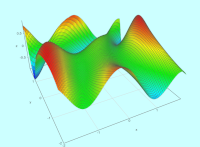


In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


A continuación se realizan algunas propuestas para minimizar la siguiente función por descenso gradiente:

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$

Propuesta 1:

In [ ]:
import numpy as np
import math

def f(X):
    return math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

def grad_f(X):
    df_dx0 = X[0] * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))
    df_dx1 = (X[1] / 2) * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1]))
    return np.array([df_dx0, df_dx1])

def gradient_descent(grad_f, x0, learning_rate, tolerance, max_iterations):
    x = x0.astype(float)
    for i in range(max_iterations):
        gradient = grad_f(x)
        if np.linalg.norm(gradient) < tolerance:
            break
        x -= learning_rate * gradient
    return x

# Parámetros de entrada
x0 = np.array([3.0, 3.0])  # Valor inicial para X[0] y X[1]
learning_rate = 0.01 # Tasa de aprendizaje
tolerance = 1e-6 # Tolerancia
max_iterations = int(1e5) # Máximo número de iteraciones

# Aplicar el método de descenso de gradiente
result = gradient_descent(grad_f, x0, learning_rate, tolerance, max_iterations)

print("Resultado - Aproximación del X que cumple grad_f(X) ≈ [0, 0]:", result)
print("Valor de f(X) en el resultado:", f(result))


Resultado - Aproximación del X que cumple grad_f(X) ≈ [0, 0]: [3.84512018 3.1865299 ]
Valor de f(X) en el resultado: -0.9812576435650714


Propuesta 2:

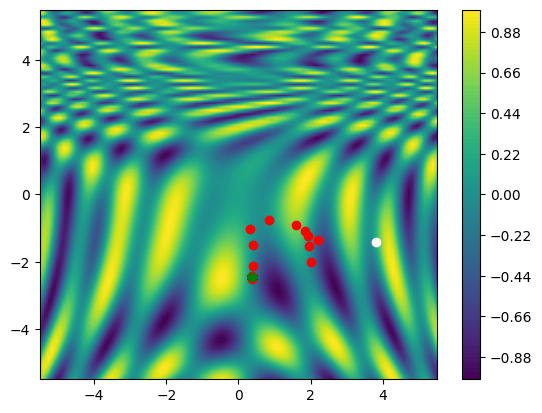

Solucion: [0.38610680025104654, -2.45254390688946] -0.11508734757691026


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# Definir la función y su gradiente
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))
df = lambda X: np.array([
    X[0] * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1])),
    (X[1] / 2) * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1]))
])

# Prepara los datos para dibujar el mapa de niveles de Z
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Pinta el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generamos un punto aleatorio inicial y pintamos de blanco
P = [random.uniform(-4, 5), random.uniform(-4, 5)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje.
TA = 1

# Iteraciones: 1000
for _ in range(1000):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibujamos el punto final y pintamos de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()
print("Solucion:", P, f(P))


## Explicación

Ambos resultados son el resultado del proceso de descenso de gradiente aplicado a la función dada. Sin embargo, hay algunas diferencias en los resultados debido a las diferencias en los puntos iniciales y en la configuración del descenso de gradiente.

En el primer código, se utilizó un punto inicial de [3, 3] para comenzar el descenso de gradiente. Después de 1000 iteraciones, el algoritmo converge a un punto aproximado que cumple grad_f(X) ≈ [0, 0]. El valor de la función f(X) en este punto es aproximadamente -0.981. Esto significa que el punto [3.84512018, 3.1865299] es una aproximación al mínimo local de la función y el valor de la función en ese mínimo local es aproximadamente -0.981.

En el segundo código, se utilizó un punto inicial diferente aleatorio entre [-4 y 5] para comenzar el descenso de gradiente. Después de 1000 iteraciones, el algoritmo converge a un punto diferente que también cumple grad_f(X) ≈ [0, 0]. El valor de la función f(X) en este punto es aproximadamente -0.115. Esto significa que el punto [0.38610680025104654, -2.45254390688946] es otra aproximación al mínimo local de la función, diferente al encontrado en el primer código, y el valor de la función en ese mínimo local es aproximadamente -0.115.

La razón por la que f(P) y f(X) no dieron lo mismo se debe a que f(P) representa el valor de la función en el punto P específico al final de la ejecución del descenso de gradiente en el segundo código, mientras que f(X) representa el valor de la función en el punto X específico obtenido como resultado del descenso de gradiente en el primer código.